# Reading the data set on python environment

In [270]:
import pandas as pd
import numpy as np

In [271]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Exit test\EXIT\Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

### Analyzing the dataset

In [272]:
df.shape

(2111, 17)

In [273]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [275]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [276]:
df.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

### Data Visualization

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Heat Map')

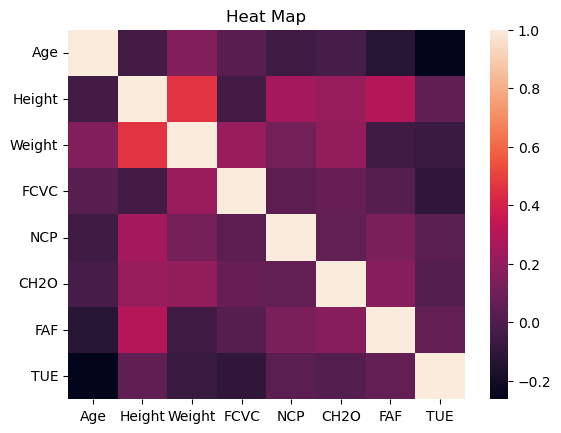

In [278]:
sns.heatmap(df.corr(numeric_only = True))
plt.title('Heat Map')

### Conclusion
__From analysing the above plot it is evident that various lifestyle factors have an impact on an individual's weight category__ 

# Preprocessing

### Handling missing values

In [279]:
df.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [281]:
df['Gender'].fillna(df['Gender'].mode, inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode, inplace=True)
df['CAEC'].fillna(df['CAEC'].mode, inplace=True)
df['SCC'].fillna(df['SCC'].mode, inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mode, inplace=True)

In [282]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Encodeing train data

In [283]:
from sklearn.preprocessing import LabelEncoder

In [284]:
x = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']

In [285]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [286]:
categorical_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [287]:
x_encoded = pd.get_dummies(x, columns=categorical_cols)

In [288]:
x_encoded.shape

(2111, 36)

In [289]:
y.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [290]:
mapping = {'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Insufficient_Weight': 5, 'Obesity_Type_II': 6, 'Obesity_Type_III': 7}
y = y.map(mapping)

In [291]:
y.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

# Training The Model

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)

### 1.KNN Classifier

In [294]:
KNN_model = KNeighborsClassifier()

In [295]:
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
KNN_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {KNN_accuracy:.4f}")

KNN Accuracy: 0.8801


### 2.Decision Trees Classifier

In [296]:
DT_model = DecisionTreeClassifier()

In [297]:
DT_model.fit(x_train, y_train)
y_pred = DT_model.predict(x_test)
DT_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Trees Accuracy: {DT_accuracy:.4f}")

Decision Trees Accuracy: 0.9054


### 3.Random Forest

In [298]:
RF_model = RandomForestClassifier()

In [299]:
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {RF_accuracy:.4f}")

Random Forest Accuracy: 0.9290


### 4.Support Vector Machines

In [300]:
SVC_model = SVC()

In [301]:
SVC_model.fit(x_train, y_train)
y_pred = SVC_model.predict(x_test)
SVC_accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Forest Accuracy: {SVC_accuracy:.4f}")

SVC Forest Accuracy: 0.5820


## Conclusion 
__Based on the evaluation of four different models, it was observed that Random Forest classifiers gives the highest accuracy .__

# Cross validation

In [302]:
from sklearn.model_selection import cross_val_score

In [303]:
k_fold = 5
cv_scores = cross_val_score(RF_model, x_encoded, y, cv=k_fold)

In [304]:
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.69976359 0.97393365 0.98104265 0.98104265 0.98104265]
Mean cross-validation score: 0.9233650409510046


## Hyperparameter tuning

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [306]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

In [309]:
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [311]:
grid_search.fit(x_encoded, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [312]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [313]:
best_rf_model = grid_search.best_estimator_

In [315]:
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

### Conclusion
__After conducting hyperparameter tuning using grid search, the Random Forest model achieved the highest accuracy compared to other models evaluated.__